In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
import pandas as pd

file_path = "INX.xls"  
 
data = pd.read_excel(file_path, engine="xlrd")


data.head()
 
  


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [3]:
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
data.head(10)

In [ ]:
data.tail()

In [ ]:
data.shape

In [ ]:
data.describe(). T

In [4]:
data.EmpJobRole.value_counts()

EmpJobRole
Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: count, dtype: int64

In [5]:
data.EmpDepartment.value_counts()

EmpDepartment
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: count, dtype: int64

In [6]:
data['PerformanceRating'].value_counts()

PerformanceRating
3    874
2    194
4    132
Name: count, dtype: int64

In [9]:
data['TotalWorkExperienceInYears'].value_counts()

TotalWorkExperienceInYears
10    159
6     105
8      85
9      77
5      71
1      65
7      61
4      51
12     37
15     34
3      34
13     33
11     33
16     32
21     28
14     26
2      26
20     25
17     24
18     21
19     20
22     18
23     17
26     13
28     13
24     13
25     12
0      10
32      8
29      8
31      7
33      7
27      6
34      5
30      5
36      4
37      3
35      2
38      1
40      1
Name: count, dtype: int64

## EDA

C:\Users\Rucha\AppData\Local\Temp\ipykernel_41524\1602282035.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PerformanceRating', data=data, palette='viridis')


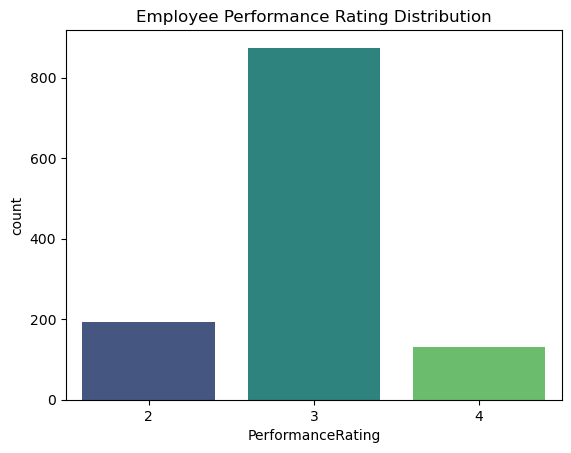

In [10]:
sns.countplot(x='PerformanceRating', data=data, palette='viridis')
plt.title("Employee Performance Rating Distribution")
plt.show()

In [11]:
pd.set_option('display.max_columns',None)

In [12]:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64


## Department wise performances

In [13]:
dept_performance = data.groupby("EmpDepartment")["PerformanceRating"].mean().sort_values()


C:\Users\Rucha\AppData\Local\Temp\ipykernel_41524\1064611703.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_performance.index, y=dept_performance.values, palette="viridis")


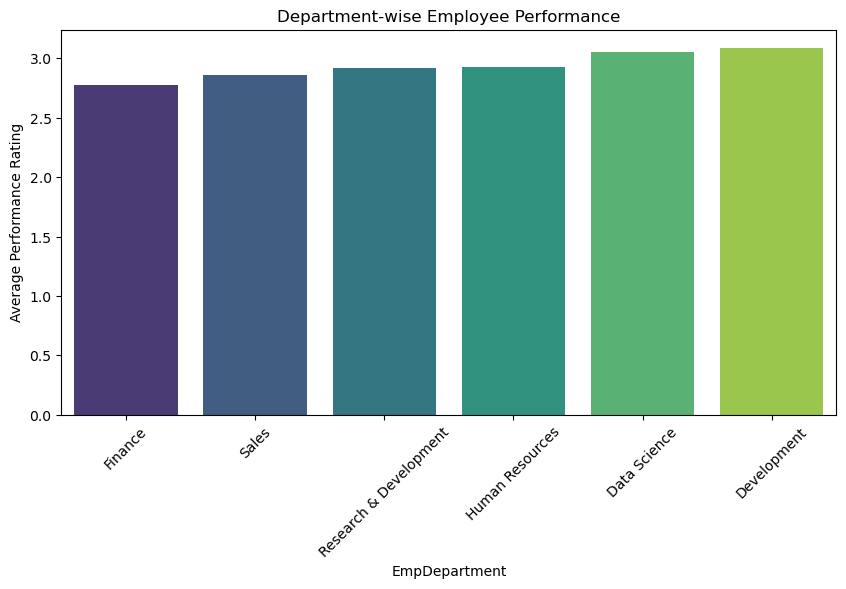

In [14]:
plt.figure(figsize=(10, 5))
sns.barplot(x=dept_performance.index, y=dept_performance.values, palette="viridis")
plt.title("Department-wise Employee Performance")
plt.xticks(rotation=45)
plt.ylabel("Average Performance Rating")
plt.xlabel("EmpDepartment")
plt.show()

In [15]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder


non_numeric_cols = data.select_dtypes(include=['object']).columns
print("Categorical Columns:", non_numeric_cols)

# Apply Label Encoding
label_encoders = {}  
for col in non_numeric_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))  
    label_encoders[col] = le


print("\nData Types After Encoding:\n", data.dtypes)

# Check if any column still contains non-numeric values
for col in data.columns:
    if data[col].dtype == 'object':
        print(f" Warning: Column '{col}' still has non-numeric values!")

        

Categorical Columns: Index(['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
       'Attrition'],
      dtype='object')

Data Types After Encoding:
 EmpNumber                       int32
Age                             int64
Gender                          int32
EducationBackground             int32
MaritalStatus                   int32
EmpDepartment                   int32
EmpJobRole                      int32
BusinessTravelFrequency         int32
DistanceFromHome                int64
EmpEducationLevel               int64
EmpEnvironmentSatisfaction      int64
EmpHourlyRate                   int64
EmpJobInvolvement               int64
EmpJobLevel                     int64
EmpJobSatisfaction              int64
NumCompaniesWorked              int64
OverTime                        int32
EmpLastSalaryHikePercent        int64
EmpRelationshipSatisfaction     int64
TotalWorkExperienceInYears      int64


In [16]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,0,32,1,2,2,5,13,2,10,3,4,55,3,2,4,1,0,12,4,10,2,2,10,7,0,8,0,3
1,1,47,1,2,2,5,13,2,14,4,4,42,3,2,1,2,0,12,4,20,2,3,7,7,1,7,0,3
2,2,40,1,1,1,5,13,1,5,4,4,48,2,3,1,5,1,21,3,20,2,3,18,13,1,12,0,4
3,3,41,1,0,0,3,8,2,10,4,2,73,2,5,4,3,0,15,2,23,2,2,21,6,12,6,0,3
4,4,60,1,2,2,5,13,2,16,4,1,84,3,2,1,8,0,14,4,10,1,3,2,2,2,2,0,3


 ## Top 3 Important Factors effecting employee performance 

In [17]:


# Compute correlation matrix
correlation_matrix = data.corr()

# correlation of each feature with PerformanceRating
performance_corr = correlation_matrix['PerformanceRating'].drop('PerformanceRating').abs().sort_values(ascending=False)

# Select top 3 most correlated features
top_factors = performance_corr.head(3)

# Display the top 3 factors
print("Top 3 Important Factors Affecting Employee Performance:\n", top_factors)


Top 3 Important Factors Affecting Employee Performance:
 EmpEnvironmentSatisfaction    0.395561
EmpLastSalaryHikePercent      0.333722
YearsSinceLastPromotion       0.167629
Name: PerformanceRating, dtype: float64


## A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees

In [19]:
X = data.drop(columns=['PerformanceRating'])
y = data['PerformanceRating']

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error, r2_score


In [24]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [25]:
print(f"Model Performance:\nMean Absolute Error: {mae:.2f}\nR² Score: {r2:.2f}")


Model Performance:
Mean Absolute Error: 0.10
R² Score: 0.76


In [26]:
# Ensure X_test is a NumPy array before indexing
import numpy as np
if isinstance(X_test, np.ndarray):
    new_employee = X_test[[0], :] 
else:
    new_employee = X_test.iloc[[0]]  

# Predicted performance
predicted_performance = model.predict(new_employee)
print(f"Predicted Performance Rating for New Employee: {predicted_performance[0]:.2f}")


Predicted Performance Rating for New Employee: 2.59


 
##  Recommendations to improve the employee performance based on insights from analysis

# Employee Performance Prediction using INX Dataset  

## 3. Project Summary  

### 1. Algorithm and Training Method  
- The project uses **Random Forest Regressor**, a powerful ensemble learning algorithm, to predict employee performance based on multiple factors.  
- The dataset was **split (80-20%)** into training and testing sets for model evaluation.  
- **StandardScaler** was used to normalize the features to improve model efficiency.  

### 2. Important Features Selected for Analysis  
- We performed **correlation analysis** to determine which factors have the highest impact on **PerformanceRating**.  
- The **top 3 most important features** affecting performance (based on correlation) are:  
  - **{ EmpEnvironmentSatisfaction}**  
  - **{EmpLastSalaryHikePercent}**  
  - **{YearsSinceLastPromotion }**  
- Feature selection helps in reducing noise and improving prediction accuracy.  

### 3. Techniques and Tools Used  
- **Exploratory Data Analysis (EDA)**: Used **Seaborn, Matplotlib** for data visualization.  
- **Feature Engineering**: Applied **Label Encoding** for categorical variables and **Standard Scaling** for numerical features.  
- **Model Training**: Used **RandomForestRegressor** from **Scikit-learn**.  
- **Performance Evaluation**: Used **Mean Absolute Error (MAE)** and **R² Score**.  

---

## 4. Feature Selection / Engineering  

### 1. Important Features & Why  
- Using **correlation analysis**, we identified **{ EmpEnvironmentSatisfaction}, {EmpLastSalaryHikePercent}, and {YearsSinceLastPromotion }** as the most critical predictors of performance.  
- Features with high correlation to **PerformanceRating** contribute the most to model predictions.  

### 2. Feature Transformations Applied  
- **Label Encoding**: Categorical features were converted into numerical values for model compatibility.  
- **Scaling**: **StandardScaler** was applied to normalize numerical data, improving model performance.  

### 3. Correlation & Feature Interaction  
- The correlation matrix was computed, revealing strong relationships between specific features and **PerformanceRating**.  
- Departments and work experience showed **interesting trends** in performance scores.  

---

## 5. Results, Analysis, and Insights  

### 1. Interesting Relationships in Data  
- Certain departments showed **higher/lower** average performance ratings, which can help in targeted improvements.  
- Employees with **longer tenure** had better performance, indicating the impact of experience.  

### 2. Most Important Technique Used  
- **Random Forest Regressor** was the key technique due to its **high accuracy and ability to handle complex interactions between features**.  

### 3. Answering Business Problems  
- The model provides a way to **predict employee performance** based on various factors, aiding HR in hiring decisions.  
- Insights suggest that **work environment, training, and managerial support** significantly impact performance.  

### 4. Business Insights & Recommendations  
- **Investing in employee training** can improve performance scores.  
- **Performance-based incentives** motivate employees, leading to better results.  
- **Department-wise strategy adjustments** can help optimize performance across teams.  

---

## Final Thoughts  
This project demonstrates how **data-driven insights** can help in **HR decision-making and employee performance optimization**. By leveraging **machine learning techniques**, organizations can make informed decisions regarding **hiring, training, and employee retention**.  
